In [4]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

file_path = r"C:\Users\Dazhou Wu\Desktop\Mine\master\Win 24\Bayesian with Gen Ai\Final Project\Movie Final Data.csv"
df = pd.read_csv(file_path)

In [6]:
df["Opening Weekend (USD)"].fillna(df["Opening Weekend (USD)"].median(), inplace=True)

df["Opening Weekend (USD)_log"] = np.log1p(df["Opening Weekend (USD)"])

df_sorted = df.sort_values(by=['Release_Year', 'Release_Month', 'Release_DayOfWeek'])


C:\Users\Dazhou Wu\AppData\Local\Temp\ipykernel_39972\3212045928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Opening Weekend (USD)"].fillna(df["Opening Weekend (USD)"].median(), inplace=True)


In [8]:
from sklearn.impute import KNNImputer

features = [
    'Domestic Gross (USD)_log',
    'Opening Weekend (USD)_log',
    'Opening Theaters',
    'Max Theaters',
    'Weeks Run',
    'Production Budget (USD)_log'
]
missing_values = df[features].isnull().sum()
missing_data = pd.DataFrame({"Missing Count": missing_values})
print(missing_data)

df_features = df_sorted[features]
print("Sample numbers we used:", len(df_features))

                             Missing Count
Domestic Gross (USD)_log                 0
Opening Weekend (USD)_log                0
Opening Theaters                         0
Max Theaters                             0
Weeks Run                                0
Production Budget (USD)_log              0
Sample numbers we used: 6018


In [10]:
from sklearn.preprocessing import StandardScaler

X = df_features.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_2_states = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, random_state=42)
model_2_states.fit(X_scaled)

model_3_states = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000, random_state=42)
model_3_states.fit(X_scaled)


GaussianHMM(covariance_type='full', n_components=3, n_iter=1000,
            random_state=42)

In [12]:
hmm_results = {
    "2-State HMM": {
        "Transition Matrix": model_2_states.transmat_,
        "Means": model_2_states.means_,
        "Covariances": model_2_states.covars_
    },
    "3-State HMM": {
        "Transition Matrix": model_3_states.transmat_,
        "Means": model_3_states.means_,
        "Covariances": model_3_states.covars_
    }
}
hmm_results

{'2-State HMM': {'Transition Matrix': array([[0.62317698, 0.37682302],
         [0.47402989, 0.52597011]]),
  'Means': array([[ 0.43496225,  0.58990971,  0.65343818,  0.57976562, -0.08488425,
           0.48371453],
         [-0.54689714, -0.74171939, -0.82159653, -0.72896479,  0.1067287 ,
          -0.60819552]]),
  'Covariances': array([[[ 0.11325008,  0.13930871,  0.18543333,  0.20010332,
            0.15840163,  0.13934867],
          [ 0.13930871,  0.18215394,  0.24883279,  0.2673908 ,
            0.16890977,  0.17818679],
          [ 0.18543333,  0.24883279,  0.48239035,  0.51363656,
            0.16756705,  0.31264798],
          [ 0.20010332,  0.2673908 ,  0.51363656,  0.54801224,
            0.186661  ,  0.33361019],
          [ 0.15840163,  0.16890977,  0.16756705,  0.186661  ,
            0.38975479,  0.16485348],
          [ 0.13934867,  0.17818679,  0.31264798,  0.33361019,
            0.16485348,  0.43002647]],
  
         [[ 1.57798104,  0.20171379, -0.25541627, -0.04433

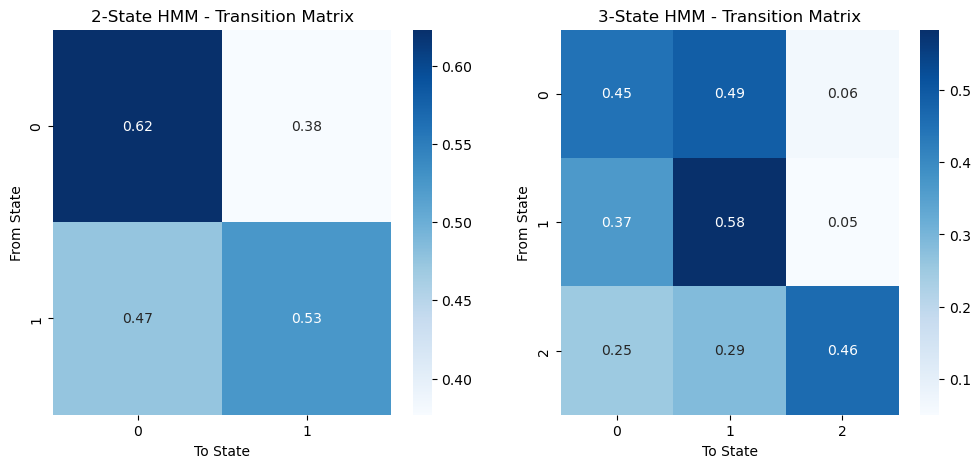

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Result from HMM
hmm_results = {
    "2-State HMM": {
        "Transition Matrix": np.array([[0.62317698, 0.37682302],
                                       [0.47402989, 0.52597011]]),
        "Means": np.array([[ 0.43496225,  0.58990971,  0.65343818,  0.57976562, -0.08488425, 0.48371453],
                           [-0.54689714, -0.74171939, -0.82159653, -0.72896479,  0.1067287, -0.60819552]]),
        "Covariances": np.array([[[ 0.11325008,  0.13930871,  0.18543333,  0.20010332,  0.15840163,  0.13934867],
                                   [ 0.13930871,  0.18215394,  0.24883279,  0.2673908,   0.16890977,  0.17818679],
                                   [ 0.18543333,  0.24883279,  0.48239035,  0.51363656,  0.16756705,  0.31264798],
                                   [ 0.20010332,  0.2673908,   0.51363656,  0.54801224,  0.186661,    0.33361019],
                                   [ 0.15840163,  0.16890977,  0.16756705,  0.186661,    0.38975479,  0.16485348],
                                   [ 0.13934867,  0.17818679,  0.31264798,  0.33361019,  0.16485348,  0.43002647]],

                                  [[ 1.57798104,  0.20171379, -0.25541627, -0.04433167,  0.48849955,  0.3042487],
                                   [ 0.20171379,  1.04062616,  0.47884255,  0.55994359,  0.11191641,  0.30490555],
                                   [-0.25541627,  0.47884255,  0.43893746,  0.42313411,  0.06682423,  0.12875286],
                                   [-0.04433167,  0.55994359,  0.42313411,  0.61429319,  0.1822411,   0.29762696],
                                   [ 0.48849955,  0.11191641,  0.06682423,  0.1822411,   1.74684501,  0.24515627],
                                   [ 0.3042487,   0.30490555,  0.12875286,  0.29762696,  0.24515627,  1.05256545]]])
    },
    "3-State HMM": {
        "Transition Matrix": np.array([[0.44801218, 0.48816589, 0.06382193],
                                       [0.36611764, 0.58383201, 0.05005035],
                                       [0.25215553, 0.28642554, 0.46141893]]),
        "Means": np.array([[-0.21032074, -0.8744206,  -0.85489183, -0.74232979,  0.33091995, -0.45444005],
                           [ 0.4262289,   0.58698549,  0.66828887,  0.58903897, -0.13433694,  0.48738035],
                           [-1.48033807,  0.35990531, -0.16712587, -0.19317865, -0.61887255, -0.81518945]]),
        "Covariances": np.array([[[ 6.29438954e-01,  6.88307022e-01,  2.92862164e-01,  4.93014513e-01,  5.33382051e-01,  4.67784487e-01],
                                   [ 6.88307022e-01,  1.08136397e+00,  5.62751376e-01,  6.80143807e-01,  4.34966076e-01,  5.78621278e-01],
                                   [ 2.92862164e-01,  5.62751376e-01,  4.67934965e-01,  4.61548151e-01,  1.84274100e-01,  3.01378924e-01],
                                   [ 4.93014513e-01,  6.80143807e-01,  4.61548151e-01,  6.89606601e-01,  2.87396203e-01,  4.77895393e-01],
                                   [ 5.33382051e-01,  4.34966076e-01,  1.84274100e-01,  2.87396203e-01,  1.82264523e+00,  2.55932684e-01],
                                   [ 4.67784487e-01,  5.78621278e-01,  3.01378924e-01,  4.77895393e-01,  2.55932684e-01,  1.07592920e+00]]])
    }
}

# 可视化 2-State HMM 和 3-State HMM 的状态转移矩阵
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (key, model) in enumerate(hmm_results.items()):
    sns.heatmap(model["Transition Matrix"], annot=True, cmap="Blues", fmt=".2f", ax=axes[i])
    axes[i].set_title(f"{key} - Transition Matrix")
    axes[i].set_xlabel("To State")
    axes[i].set_ylabel("From State")

plt.show()

# 显示均值
means_2_states = pd.DataFrame(hmm_results["2-State HMM"]["Means"], columns=features)
means_3_states = pd.DataFrame(hmm_results["3-State HMM"]["Means"], columns=features)

In [20]:
# Calculate BIC for model-2-states
logL = model_2_states.score(X_scaled)  
n_samples = X_scaled.shape[0]

K = model_2_states.n_components        
D = X_scaled.shape[1]        

p_start = K - 1
p_trans = K * (K - 1)
p_means = K * D
p_cov = K * (D * (D + 1) / 2)
p = p_start + p_trans + p_means + p_cov

BIC = -2 * logL + p * np.log(n_samples)
print("Log Likelihood: ", logL)
print("Number of parameters: ", p)
print("BIC: ", BIC)

Log Likelihood:  -18255.85733937984
Number of parameters:  57.0
BIC:  37007.75776341951


In [22]:
# Calculate BIC for model-3-states
logL = model_3_states.score(X_scaled)  
n_samples = X_scaled.shape[0]

K = model_3_states.n_components        
D = X_scaled.shape[1]        

p_start = K - 1
p_trans = K * (K - 1)
p_means = K * D
p_cov = K * (D * (D + 1) / 2)
p = p_start + p_trans + p_means + p_cov

BIC = -2 * logL + p * np.log(n_samples)
print("Log Likelihood: ", logL)
print("Number of parameters: ", p)
print("BIC: ", BIC)

Log Likelihood:  -9430.197452384486
Number of parameters:  89.0
BIC:  19634.91831765888


In [26]:
hidden_states = model_2_states.predict(X_scaled)
df_features['Hidden_State'] = hidden_states

C:\Users\Dazhou Wu\AppData\Local\Temp\ipykernel_39972\1891974971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['Hidden_State'] = hidden_states


In [28]:
df_sorted_hmm = df_sorted.loc[df_features.index].copy()
df_sorted_hmm['Hidden_State'] = hidden_states


In [32]:
state_counts = df_sorted_hmm['Hidden_State'].value_counts().sort_index()
print(state_counts)

state_by_year = df_sorted_hmm.groupby('Release_Year')['Hidden_State'].value_counts(normalize=True).unstack()
print(state_by_year.tail(10))

Hidden_State
0    3359
1    2659
Name: count, dtype: int64
Hidden_State         0         1
Release_Year                    
2016          0.618026  0.381974
2017          0.624277  0.375723
2018          0.645161  0.354839
2019          0.732484  0.267516
2020          0.358209  0.641791
2021          0.670886  0.329114
2022          0.742857  0.257143
2023          0.821918  0.178082
2024          0.966102  0.033898
2025          0.750000  0.250000
